In [ ]:
import csv

tA = [] # sigA
tB = [] # sigB
tC = [] # sigC
tD = [] # sigD
dataA = [] # sigA
dataB = [] # sigB
dataC = [] # sigC
dataD = [] # sigD

with open('/Users/theyiranhuang/Documents/GitHub/ME433/HW10/dsp/sigA.csv') as f:
    # open the csv file
    reader = csv.reader(f)
    for row in reader:
        # read the rows 1 one by one
        tA.append(float(row[0])) # leftmost column
        dataA.append(float(row[1])) # second column
        # data2.append(float(row[2])) # third column

with open('/Users/theyiranhuang/Documents/GitHub/ME433/HW10/dsp/sigB.csv') as f:
    # open the csv file
    reader = csv.reader(f)
    for row in reader:
        # read the rows 1 one by one
        tB.append(float(row[0])) # leftmost column
        dataB.append(float(row[1])) # second column
        # data2.append(float(row[2])) # third column

with open('/Users/theyiranhuang/Documents/GitHub/ME433/HW10/dsp/sigC.csv') as f:
    # open the csv file
    reader = csv.reader(f)
    for row in reader:
        # read the rows 1 one by one
        tC.append(float(row[0])) # leftmost column
        dataC.append(float(row[1])) # second column
        # data2.append(float(row[2])) # third column

with open('/Users/theyiranhuang/Documents/GitHub/ME433/HW10/dsp/sigD.csv') as f:
    # open the csv file
    reader = csv.reader(f)
    for row in reader:
        # read the rows 1 one by one
        tD.append(float(row[0])) # leftmost column
        dataD.append(float(row[1])) # second column
        # data2.append(float(row[2])) # third column

for i in range(2):
    # print the data to verify it was read
    print(str(tA[i]) + ", " + str(dataA[i]))
    print(str(tB[i]) + ", " + str(dataB[i]))
    print(str(tC[i]) + ", " + str(dataC[i]))
    print(str(tD[i]) + ", " + str(dataD[i]))


In [ ]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # for sine function

# dt = 1.0/100.0 # 100Hz
# t = np.arange(0.0, 5.0, dt) # for 5s

# s = 2.0 * np.sin(2 * np.pi * 2.3 * t) + 2.5 # 2.3Hz

plt.plot(tA,dataA,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal A vs Time')
plt.show()

plt.plot(tB,dataB,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal B vs Time')
plt.show()

plt.plot(tC,dataC,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal C vs Time')
plt.show()

plt.plot(tD,dataD,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal D vs Time')
plt.show()

In [7]:
def calc_fft(t,data):
    dt = (t[-1]-t[0])/len(t)
    Fs = 1.0/dt # sample rate
    # print("Fs = ", Fs)
    Ts = t[-1]
    ts = np.arange(0,t[-1],Ts) # time vector
    y = data # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    return frq,Y

def plot_fft(t,data):
    frq,Y = calc_fft(t,data)
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,data,'b')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax1.set_title('Signal vs Time')
    ax2.loglog(frq,abs(Y),'b') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    ax2.set_title('Signal FFT')
    plt.tight_layout()
    plt.show()

def compare_fft(t1, data1, t2, data2):
    frq1,Y1 = calc_fft(t1,data1) # unfiltered
    frq2,Y2 = calc_fft(t2,data2) # filtered
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t1,data1,'b',t2,data2,'r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax1.set_title('Signal A vs Time')
    ax2.loglog(frq1,abs(Y1),'b',frq2,abs(Y2),'r') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    ax2.set_title('Signal A FFT')
    plt.tight_layout()
    plt.show()

In [8]:
def maf(num,t,data):
    maf = []
    for i in range(len(data)):
        if i < num:
            maf.append(0)
        else:
            avg = sum(data[i-num:i])/num
            maf.append(avg)
    compare_fft(t, data, t, maf)


In [9]:
def iir(A,B,t,data):
    iir = []
    avg = 0
    for i in range(len(data)):
        avg = A*avg+B*data[i]
        iir.append(avg)
    compare_fft(t, data, t, iir)

In [43]:
hA = [
    0.000335663804384691,
    0.000185977920694039,
    0.000000000000000000,
    -0.000209601405729659,
    -0.000424393710026574,
    -0.000618678652290745,
    -0.000759918533814805,
    -0.000811875322588322,
    -0.000740595215887188,
    -0.000522559786261783,
    -0.000153535495470780,
    0.000343917284416712,
    0.000916496656520799,
    0.001481683969124152,
    0.001935842350119375,
    0.002168781049129453,
    0.002083266863904922,
    0.001616618323869213,
    0.000760526050762049,
    -0.000425141835796668,
    -0.001808400830025119,
    -0.003193729242131740,
    -0.004343921733717449,
    -0.005013643762451980,
    -0.004990723120374534,
    -0.004139192569290203,
    -0.002436855216264284,
    0.000000000000000003,
    0.002910992536667108,
    0.005909087729257011,
    0.008521728799849556,
    0.010252522775302917,
    0.010656613863793964,
    0.009419836752319987,
    0.006429947715129549,
    0.001828090598135386,
    -0.003969658237045596,
    -0.010287411436344750,
    -0.016243255534310361,
    -0.020838233006236925,
    -0.023071655375623987,
    -0.022069363116670113,
    -0.017208645661252259,
    -0.008222778912162994,
    0.004730235958017176,
    0.021046249010899094,
    0.039706649005084915,
    0.059362155152156988,
    0.078460749541007999,
    0.095405655796807917,
    0.108724855049779578,
    0.117231597290347003,
    0.120156051728575020,
    0.117231597290347003,
    0.108724855049779578,
    0.095405655796807931,
    0.078460749541007999,
    0.059362155152156988,
    0.039706649005084915,
    0.021046249010899097,
    0.004730235958017177,
    -0.008222778912162994,
    -0.017208645661252259,
    -0.022069363116670113,
    -0.023071655375623987,
    -0.020838233006236925,
    -0.016243255534310365,
    -0.010287411436344750,
    -0.003969658237045597,
    0.001828090598135387,
    0.006429947715129551,
    0.009419836752319987,
    0.010656613863793967,
    0.010252522775302923,
    0.008521728799849557,
    0.005909087729257012,
    0.002910992536667109,
    0.000000000000000003,
    -0.002436855216264284,
    -0.004139192569290201,
    -0.004990723120374534,
    -0.005013643762451982,
    -0.004343921733717452,
    -0.003193729242131739,
    -0.001808400830025119,
    -0.000425141835796669,
    0.000760526050762049,
    0.001616618323869215,
    0.002083266863904926,
    0.002168781049129453,
    0.001935842350119376,
    0.001481683969124152,
    0.000916496656520799,
    0.000343917284416712,
    -0.000153535495470780,
    -0.000522559786261784,
    -0.000740595215887188,
    -0.000811875322588322,
    -0.000759918533814806,
    -0.000618678652290745,
    -0.000424393710026574,
    -0.000209601405729659,
    0.000000000000000000,
    0.000185977920694039,
    0.000335663804384691,
]

In [ ]:
hB = []
hC = []
hD = []

In [35]:
def fir(t,data):
    fir = []
    avg = 0
    h = []
    if data == dataA:
        h = hA
    elif data == dataB:
        h = hB
    elif data == dataC:
        h = hC
    elif data == dataD:
        h = hD
    print(len(h))
    for i in range(len(data)):
        if i < len(h):
            fir.append(0)
        else:
            avg = 0
            for j in range(len(h)):
                avg += h[j]*data[i-j]
            fir.append(avg)
    compare_fft(t, data, t, fir)


105


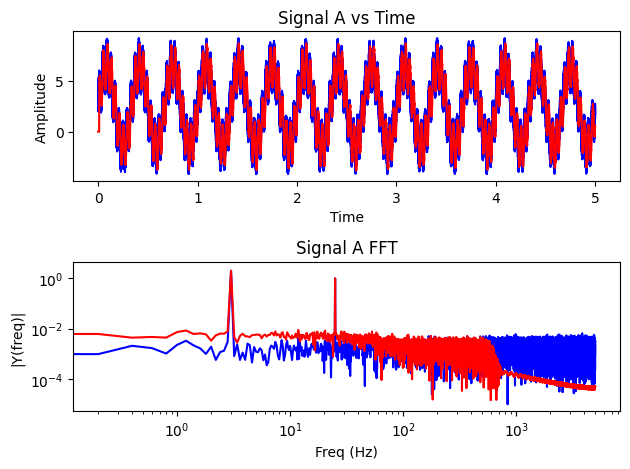

In [44]:
fir(tA,dataA)

In [ ]:
plot_fft(tA,dataA)

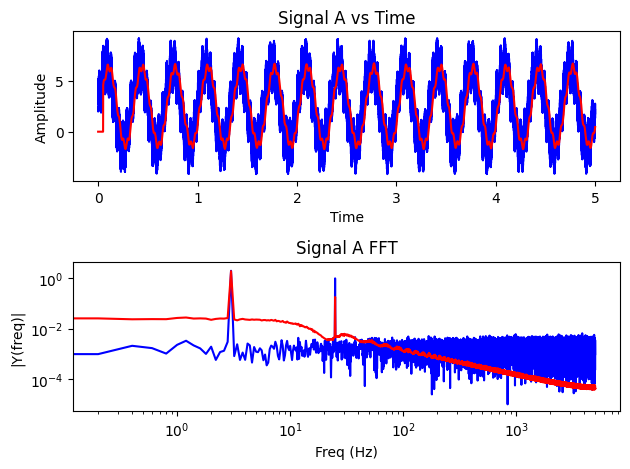

In [45]:
maf(500,tA,dataA)

In [ ]:
iir(0.9,0.1,tA,dataA)